In [1]:
from Game import *
from Game.minimax import *

Version:  0.2.42


## Nim

In [2]:
def initial_state(): 
    """ returns  - The initial state of the game"""
    return 21

def valid_moves(state,player):
    """returns  - a list of the valid moves for the state and player"""

    if state==2:
        return [1,2]
    elif state==1:
        return [1]
    else:
        return [1,2,3]

def show_state(state):
    """prints or shows the current state"""
    print("There are",state,"sticks.")

def update_state(state,player,move):
    """returns  - the new state after the move for the player"""

    new_state=state-move

    return new_state


def win_status(state,player):
    """    returns  - 'win'  if the state is a winning state for the player, 
               'lose' if the state is a losing state for the player,
               'stalemate' for a stalemate
               None otherwise
    """

    if state==0:
        return 'lose'

    if state==1:
        return 'win'


    return None
    


## Agents

In [3]:
def random_move(state,player):    
    moves=valid_moves(state,player)
    return random.choice(moves)

random_agent=Agent(random_move)

def human_move(state,player):
    print("Player ", player)
    valid_move=False
    while not valid_move:
        move=int(input('What is your move? '))

        if move in valid_moves(state,player):
            valid_move=True
        else:
            print("Illegal move.")

    return move

human_agent=Agent(human_move)

In [4]:
def minimax_move(state,player):
    values,moves=minimax_values(state,player,display=False)
    return top_choice(moves,values)


minimax_agent=Agent(minimax_move)

In [5]:
def skittles_move(state,player,info):
    S=info.S
    last_state=info.last_state
    last_action=info.last_action

    original_state=state
    state=adjusted_state(original_state)
    original_last_state=last_state
    last_state=adjusted_state(original_last_state)
    
    # make/adjust the table

    if state not in S:
        # add a row to the table for each move
        S[state]=Table()
        moves=valid_moves(state,player)
        for action in moves:
            S[state][action]=3  # number of skittles/beads for each move
    
    move=weighted_choice(S[state])

    if move is None:  # there are no skittles in this row
        if last_state:
            S[last_state][last_action]=S[last_state][last_action]-1
            if S[last_state][last_action]<0:
                S[last_state][last_action]=0

        move=random_move(state,player)

    
    return move

def skittles_after(status,player,info):
    S=info.S
    last_state=info.last_state
    last_action=info.last_action

    if status=='lose':
        if last_state:
            S[last_state][last_action]=S[last_state][last_action]-1
            if S[last_state][last_action]<0:
                S[last_state][last_action]=0
                
    # does this double-count the learning if you lose on your own turn        
    

In [6]:
skittles_agent=Agent(skittles_move)
skittles_agent.S=Table()
skittles_agent.post=skittles_after

In [7]:
def perfect_move(state,player):
    move=(state-1)%4

    if move==0:  # bad state
        move=1

    return move

perfect_agent=Agent(perfect_move)

In [12]:
g=Game(number_of_games=100)
g.display=False
g.run(perfect_agent,skittles_agent)
g.report()  

Total number of games:  100
Winning 0.00 percent
Losing 100.00 percent
Tie 0.00 percent


In [9]:
SaveTable(skittles_agent.S,'nim skittles.json')

In [26]:
from tqdm import tqdm

In [28]:
player_one_win_percentage=[]
player_two_win_percentage=[]
tie_percentage=[]
number_of_games_played=[]
number_of_games_per_loop=10

agent1=perfect_agent
agent2=skittles_agent
skittles_agent.S=Table()

games_so_far=0
for i in tqdm(range(100),total=100):
    g=Game(number_of_games=number_of_games_per_loop)
    g.display=False
    result=g.run(agent1,agent2)

    games_so_far+=number_of_games_per_loop

    number_of_games_played.append(games_so_far)
    player_one_win_percentage.append(result.count(1)/number_of_games_per_loop)    
    player_two_win_percentage.append(result.count(2)/number_of_games_per_loop)    
    tie_percentage.append(result.count(0)/number_of_games_per_loop)    

SaveTable(skittles_agent.S,'nim skittles.json')

100%|█████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 91.66it/s]


In [29]:
%matplotlib inline
from pylab import plot

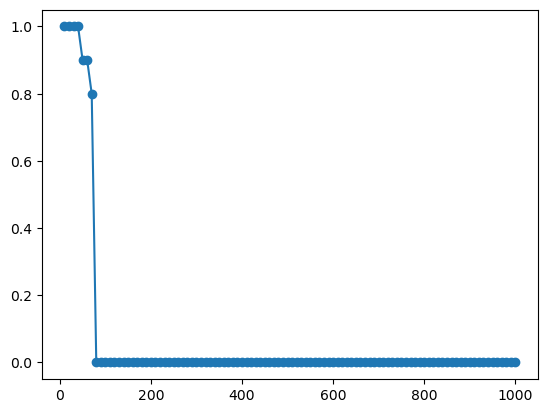

In [31]:

plot(number_of_games_played,player_one_win_percentage,'-o')